**Importing pandas here**

In [1]:
import pandas as pd

In [2]:
# Mounting GDrie
from google.colab import drive
drive.mount('/content/gdrive')
!rm -rf ./sample_data/

Mounted at /content/gdrive


**Importing dataset and Having a look at dataset**

In [3]:
train=pd.read_csv("/content/gdrive/MyDrive/Sir Owais/Lattest P+Accent/Dataset 2.csv")
test=pd.read_csv("/content/gdrive/MyDrive/Sir Owais/Lattest P+Accent/Dataset 1.csv")
stopw=pd.read_csv("/content/gdrive/MyDrive/Sir Owais/Lattest P+Accent/Stopword.csv")
test=test[['tweet','target']]
test.head()

,tweet,target
0,قوم کے لیے پرانے خاندانی نمک حرام ہیں,1
1,اور پھر بھی ان خنزیروں کو بغض نواز میں سپورٹ ک...,0
2,پاکستان کے قبضے میں اسرائیلی پائلٹ ہے۔,0
3,اور نواز شریف کا نواسہ مستقبل کا وزیر اعظم,0
4,صرف ٹویٹر پہ بکواس کرنا ہی آسان ہے,0


### Dataset Cleaning process
1. Remove Missing values

In [4]:
nan_value = float("NaN")
train.replace("", nan_value, inplace=True)
train.dropna(subset = ["tweet"], inplace=True)
train.tail()
print(train['target'].value_counts())
nan_value = float("NaN")
test.replace("", nan_value, inplace=True)
test.dropna(subset = ["tweet"], inplace=True)
test.tail()
print(test['target'].value_counts())

1    1108
0    1062
Name: target, dtype: int64
0    1213
1    1187
Name: target, dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


### Dataset Cleaning process
2. Acquring Stopwords

In [5]:
stopwords=[]
for i in (stopw['Stopwords']):
    stopwords.append(i)

### Dataset Cleaning process
1. Remove Missing values
2. Tokenization
3. Cleaning Extra Characters
4. Removal of Stopwords

In [6]:
!pip install urduhack[tf-gpu]

     |████████████████████████████████| 105 kB 5.7 MB/s 
     |████████████████████████████████| 3.4 MB 33.2 MB/s 
     |████████████████████████████████| 497.5 MB 26 kB/s 
     |████████████████████████████████| 462 kB 46.5 MB/s 
     |████████████████████████████████| 1.1 MB 25.9 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [7]:
from urduhack.preprocessing import remove_punctuation
from urduhack.preprocessing import remove_accents
tain_corpus=[]
for i in (train['tweet']):
        i=remove_punctuation(i)
        i=remove_accents(i)
        review=i.split()
        review=[word for word in review if word not in stopwords]
        review=' '.join(review)
        tain_corpus.append(review)
test_corpus=[]
for i in (test['tweet']):
        i=remove_punctuation(i)
        i=remove_accents(i)
        review=i.split()
        review=[word for word in review if word not in stopwords]
        review=' '.join(review)
        test_corpus.append(review)

### Feature Extraction
1. **TFIDF** Term Frequency Inverse Document Frequencey
2. Looking at vocubalary

In [8]:
# from sklearn.feature_extraction.text import CountVectorizer    
# cv=CountVectorizer(max_features=3000)
from sklearn.feature_extraction.text import TfidfVectorizer
max_feature_num = 10000
train_vectorizer = TfidfVectorizer(max_features=max_feature_num)
X_train=train_vectorizer.fit_transform(tain_corpus).toarray()
y_train=train['target']
train_vectorizer.vocabulary_
test_vectorizer = TfidfVectorizer(max_features=max_feature_num,vocabulary=train_vectorizer.vocabulary_)
X_test=test_vectorizer.fit_transform(test_corpus).toarray()
y_test=test['target']
train_vectorizer.vocabulary_

{'شام': 1045,
 'دلے': 722,
 'جواب': 600,
 'گانڈ': 2278,
 'مار': 1315,
 'چوتیوں': 1920,
 'کنسرٹ': 2160,
 'کینسل': 2255,
 'ہاتھ': 2373,
 'ڈال': 2008,
 'انتڑیاں': 148,
 'نکالے': 1548,
 'سکی': 1009,
 'اچھی': 209,
 'ویڈیو': 1623,
 'برا': 303,
 'مزاق': 1385,
 'اتنی': 82,
 'بھائی': 410,
 'شادی': 1044,
 'جملے': 592,
 'قابل': 1198,
 'لوڑا': 1255,
 'آگیا': 66,
 'للی': 1233,
 'ٹوپا': 1650,
 'زور': 878,
 'لگائے': 1286,
 'بند': 353,
 'کروانےمیں': 2112,
 'چوتیا': 1910,
 'دکی': 746,
 'بین': 464,
 'ابرار': 72,
 'ہندو': 2404,
 'کلچر': 2134,
 'بکواس': 406,
 'بناتے': 343,
 'لوگ': 1262,
 'ابلیس': 73,
 'اوئے': 179,
 'نازک': 1507,
 'صورتحال': 1095,
 'فر': 1161,
 'ابیلس': 76,
 'اچھا': 205,
 'نام': 1510,
 'نئی': 1498,
 'دیکھو': 779,
 'ڈنڈا': 2031,
 'کینیڈا': 2257,
 'اوقات': 184,
 'بھول': 428,
 'سالے': 902,
 'اردو': 101,
 'بولنی': 374,
 'گانڈو': 2282,
 'بہن': 455,
 'لوڑے': 1259,
 'ہا': 2368,
 'حچاب': 663,
 'چوتیاپا': 1913,
 'بنا': 333,
 'کراور': 2085,
 'شہرت': 1083,
 'ملے': 1436,
 'ہوگا': 2417,
 'ملا': 1423,
 

## Test Train Split
1. 75% Training 25% Testing

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test1,y_train,y_test1 = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

# Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
dtc_probs = classifier.predict_proba(X_test)
dtc_probs=dtc_probs[:,1]

# Decision Tree Evaluation
1. Test Train split Accuracy, precision, recall and f1 score
2. F1 Score for 10 Fold Cross Validation

In [11]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
print("----------------Test Train Score Complete Datasets---------------")
print("confusion matrix")
print(cm)
acc=accuracy_score(y_test, pred)
pr=precision_score(y_test, pred,average='macro')
re=recall_score(y_test, pred,average='macro')
fs=f1_score(y_test, pred,average='macro')
print('Accuracy score: {}'.format(acc))
print('Precision score: {}'.format(pr))
print('F1 score: {}'.format(fs))
print('Recall score: {}'.format(re))

----------------Test Train Score Complete Datasets---------------
confusion matrix
[[906 307]
 [403 784]]
Accuracy score: 0.7041666666666667
Precision score: 0.7053690903909269
F1 score: 0.703400244659986
Recall score: 0.7036985590670016


## AUC ROC Curve
1. AUC Value
2. Curve

Classifier: ROC AUC=0.704


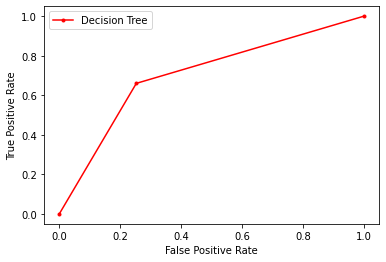

In [12]:
# submission={
#     'id':data['id'],
#     'target':test_pred,
#     'score':dtc_probs,
# }

# submission=pd.DataFrame(submission)
# submission.to_csv("subt.csv")
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
lr_auc = roc_auc_score(y_test, dtc_probs)
# summarize scores
print('Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, 'r',marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
kf = KFold(n_splits=4)
mae_train = []
mae_test = []

## Learning Curve

No handles with labels found to put in legend.


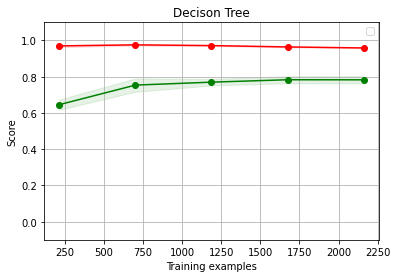

In [13]:
# imports
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
def plot_curve():
    # instantiate
    lg = DecisionTreeClassifier()

    # fit
    lg.fit(X_test, y_test)
    
    
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    train_sizes, train_scores, test_scores = learning_curve(lg, X_test, y_test, n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("Decison Tree")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()
plot_curve()

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
dtc_probs = classifier.predict_proba(X_test)
dtc_probs=dtc_probs[:,1]

## Logistic Regression
1. Test Train split Accuracy, precision, recall and f1 score
2. F1 Score for 10 Fold Cross Validation

In [15]:
cm=confusion_matrix(y_test,pred)
print("Complete Dataset Results")
print("confusion matrix")
print(cm)
acc=accuracy_score(y_test, pred)
pr=precision_score(y_test, pred,average='macro')
re=recall_score(y_test, pred,average='macro')
fs=f1_score(y_test, pred,average='macro')
print('Accuracy score: {}'.format(acc))
print('Precision score: {}'.format(pr))
print('F1 score: {}'.format(fs))
print('Recall score: {}'.format(re))

Complete Dataset Results
confusion matrix
[[950 263]
 [459 728]]
Accuracy score: 0.6991666666666667
Precision score: 0.7044242755416206
F1 score: 0.6965704475585899
Recall score: 0.6982465303219614


#AUC ROC Curve

Classifier: ROC AUC=0.766


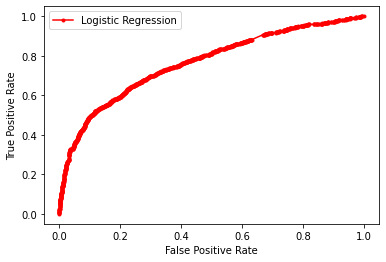

In [16]:
# submission={
#     'id':data['id'],
#     'target':test_pred,
#     'score':dtc_probs,
# }

# submission=pd.DataFrame(submission)
# submission.to_csv("subt.csv")
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
lr_auc = roc_auc_score(y_test, dtc_probs)
# summarize scores
print('Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, 'r',marker='.', label='Logistic Regression')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
kf = KFold(n_splits=4)
mae_train = []
mae_test = []

## Learning Curve

No handles with labels found to put in legend.


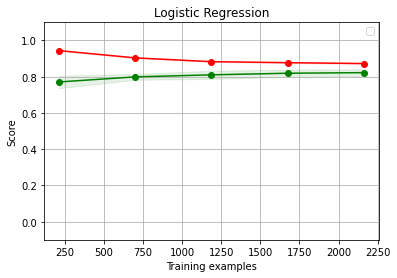

In [17]:
# imports
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
def plot_curve():
    # instantiate
    lg = LogisticRegression()

    # fit
    lg.fit(X_test , y_test)
    
    
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    train_sizes, train_scores, test_scores = learning_curve(lg, X_test, y_test, n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("Logistic Regression")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()
plot_curve()

## SVM

In [18]:
from sklearn.svm import SVC
classifier=SVC(probability=True)
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
dtc_probs = classifier.predict_proba(X_test)
dtc_probs=dtc_probs[:,1]

## SVM
1. Test Train split Accuracy, precision, recall and f1 score
2. F1 Score for 10 Fold Cross Validation

In [19]:
cm=confusion_matrix(y_test,pred)
print("Complete Dataset Score")
print("confusion matrix")
print(cm)
acc=accuracy_score(y_test, pred)
pr=precision_score(y_test, pred,average='macro')
re=recall_score(y_test, pred,average='macro')
fs=f1_score(y_test, pred,average='macro')
print('Accuracy score: {}'.format(acc))
print('Precision score: {}'.format(pr))
print('F1 score: {}'.format(fs))
print('Recall score: {}'.format(re))

Complete Dataset Score
confusion matrix
[[988 225]
 [488 699]]
Accuracy score: 0.7029166666666666
Precision score: 0.712935100130222
F1 score: 0.6985455244351296
Recall score: 0.7016945044244776


## AUC ROC Curve

Classifier: ROC AUC=0.761


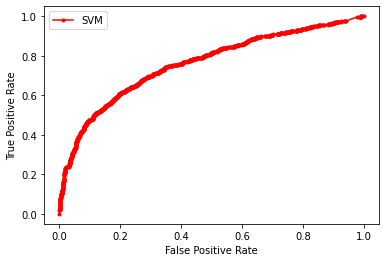

In [20]:
# submission={
#     'id':data['id'],
#     'target':test_pred,
#     'score':dtc_probs,
# }

# submission=pd.DataFrame(submission)
# submission.to_csv("subt.csv")
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
lr_auc = roc_auc_score(y_test, dtc_probs)
# summarize scores
print('Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, 'r',marker='.', label='SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
kf = KFold(n_splits=4)
mae_train = []
mae_test = []

## Learning Curve

No handles with labels found to put in legend.


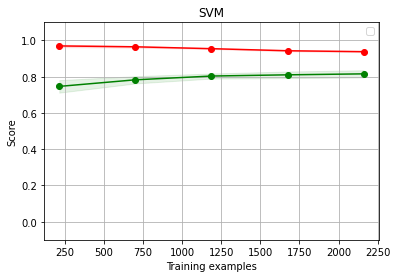

In [21]:
# imports
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
def plot_curve():
    # instantiate
    lg = SVC()

    # fit
    lg.fit(X_test, y_test)
    
    
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    train_sizes, train_scores, test_scores = learning_curve(lg, X_test, y_test, n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("SVM")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()
plot_curve()

In [22]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

## Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
dtc_probs = classifier.predict_proba(X_test)
dtc_probs=dtc_probs[:,1]

## Naive Bayes
1. Test Train split Accuracy, precision, recall and f1 score
2. F1 Score for 10 Fold Cross Validation

In [24]:
cm=confusion_matrix(y_test,pred)
print("Complete Dataset Results")
print("confusion matrix")
print(cm)
acc=accuracy_score(y_test, pred)
pr=precision_score(y_test, pred,average='macro')
re=recall_score(y_test, pred,average='macro')
fs=f1_score(y_test, pred,average='macro')
print('Accuracy score: {}'.format(acc))
print('Precision score: {}'.format(pr))
print('F1 score: {}'.format(fs))
print('Recall score: {}'.format(re))

Complete Dataset Results
confusion matrix
[[460 753]
 [226 961]]
Accuracy score: 0.5920833333333333
Precision score: 0.6156153576616511
F1 score: 0.5734978350876448
Recall score: 0.5944145528190461


## AUC ROC Curve

Classifier: ROC AUC=0.594


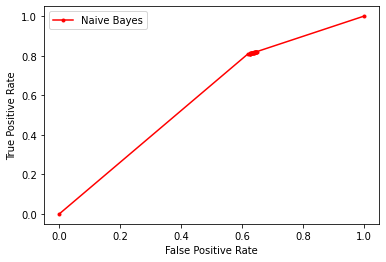

In [25]:
# submission={
#     'id':data['id'],
#     'target':test_pred,
#     'score':dtc_probs,
# }

# submission=pd.DataFrame(submission)
# submission.to_csv("subt.csv")
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
lr_auc = roc_auc_score(y_test, dtc_probs)
# summarize scores
print('Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, 'r',marker='.', label='Naive Bayes')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
kf = KFold(n_splits=4)
mae_train = []
mae_test = []

## Learning Curve

No handles with labels found to put in legend.


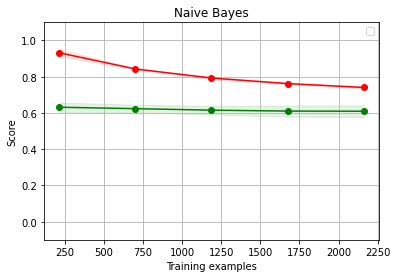

In [26]:
# imports
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
def plot_curve():
    # instantiate
    lg = GaussianNB()

    # fit
    lg.fit(X_test, y_test)
    
    
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    train_sizes, train_scores, test_scores = learning_curve(lg, X_test, y_test, n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("Naive Bayes")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()
plot_curve()

## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
dtc_probs = classifier.predict_proba(X_test)
dtc_probs=dtc_probs[:,1]

## Random Forest
1. Test Train split Accuracy, precision, recall and f1 score
2. F1 Score for 10 Fold Cross Validation

In [28]:
cm=confusion_matrix(y_test,pred)
print("confusion matrix")
print("Complete Dataset Results")
print(cm)
acc=accuracy_score(y_test, pred)
pr=precision_score(y_test, pred,average='macro')
re=recall_score(y_test, pred,average='macro')
fs=f1_score(y_test, pred,average='macro')
print('Accuracy score: {}'.format(acc))
print('Precision score: {}'.format(pr))
print('F1 score: {}'.format(fs))
print('Recall score: {}'.format(re))

confusion matrix
Complete Dataset Results
[[987 226]
 [463 724]]
Accuracy score: 0.7129166666666666
Precision score: 0.7213974591651542
F1 score: 0.7094273226528779
Recall score: 0.7118130530596993


## AUC ROC Curve

Classifier: ROC AUC=0.756


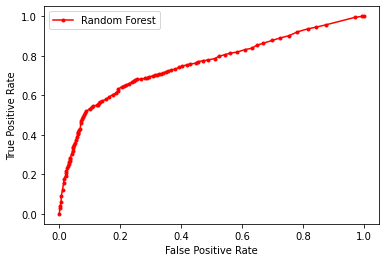

In [29]:
# submission={
#     'id':data['id'],
#     'target':test_pred,
#     'score':dtc_probs,
# }

# submission=pd.DataFrame(submission)
# submission.to_csv("subt.csv")
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
lr_auc = roc_auc_score(y_test, dtc_probs)
# summarize scores
print('Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, 'r',marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
kf = KFold(n_splits=4)
mae_train = []
mae_test = []

## Learning Curve

No handles with labels found to put in legend.


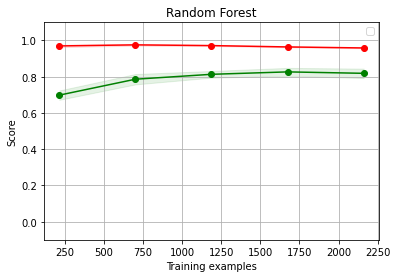

In [30]:
# imports
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
def plot_curve():
    # instantiate
    lg = RandomForestClassifier()

    # fit
    lg.fit(X_test, y_test)
    
    
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    train_sizes, train_scores, test_scores = learning_curve(lg, X_test, y_test, n_jobs=-1, cv=10, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("Random Forest")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()
plot_curve()